Run standard imports

In [ ]:
%reload_ext autoreload
%autoreload 2

## Data storage and manipulation
import numpy as np
import pandas as pd
import xarray as xr ## !pip install xarray==2022.3
import math
import copy
import datetime
!pip install Bottleneck
import bottleneck

## Plotting
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
from matplotlib.pyplot import cm

import os

Import PyHyperScattering

In [ ]:
!pip install PyHyperScattering
!pip install --upgrade pyhyperscattering[bluesky]
import PyHyperScattering as phs
from PyHyperScattering import __version__
print(f'USING PYHYPER VERSION: {__version__}')

/usr/local/lib/python3.10/dist-packages/PyHyperScattering/integrate.py:3: UserWarning: Could not import CuPy or ndigpu.  If you expect this machine to support CuPy, check dependencies.  Falling back to scikit-image/numpy CPU integration.
  from PyHyperScattering.WPIntegrator import WPIntegrator


USING PYHYPER VERSION: 0.2.3


/usr/local/lib/python3.10/dist-packages/PyHyperScattering/util.py:4: UserWarning: Could not import package for interactive integration utils.  Install holoviews and scikit-image.
  from PyHyperScattering import IntegrationUtils


Run this if accessing BNL data. If accessing from local machine, enter BNL credentials and 2-factor authentication when prompted.

In [ ]:
!pip install "tiled[client]"
!pip install --pre --upgrade tiled databroker
!pip install starlette ## Needed for tiled client
import tiled
from tiled.client import from_uri, from_profile

#Catalog = tiled.client.from_profile("rsoxs") ## From NSLS II Jupyterhub
Catalog = from_uri("https://tiled.nsls2.bnl.gov", username="pketkar")["rsoxs"]["raw"] ## From local machine
#Catalog = phs.load.SST1RSoXSDB(corr_mode='none').c ## Using PyHyperScattering locally or on jupyterhyb
Catalog

Username pketkar
··········
NOTICE TO USERS

This is a Federal computer system (and/or it is directly connected to a BNL local network system) and is the property of the United States Government. It is for authorized use only. Users (authorized or unauthorized) have no explicit or implicit expectation of privacy.

Any or all uses of this system and all files on this system may be intercepted, monitored, recorded, copied, audited, inspected, and disclosed to authorized site, Department of Energy, and law enforcement personnel, as well as authorized officials of other agencies, both domestic and foreign. By using this system, the user consents to such interception, monitoring, recording, copying, auditing, inspection, and disclosure at the discretion of authorized site or Department of Energy personnel.

Unauthorized or improper use of this system may result in administrative disciplinary action and civil and criminal penalties. By continuing to use this system you indicate your awarenes

<Catalog {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...} ~84819 entries>

## NEXAFS analysis

### Load summary of scans

Narrow down search parameters as needed to find the desired scan from RSoXS chamber.

In [ ]:
Loader = phs.load.SST1RSoXSDB(corr_mode='none')
FilteredList = Loader.searchCatalog(cycle="2024-1", proposal_id ="314142", sample_id="PK_B61", plan="nexafs_carbon")
FilteredList

could not directly connect to Tiled using a system profile.
  Making network connection.
  Enter your BNL credentials now or pass an api key like catalog_kwargs={"api_key":"..."}.


Running catalog search...:   0%|          | 0/11 [00:00<?, ?it/s]

Retrieving results...:   0%|          | 0/43 [00:00<?, ?it/s]

<ipython-input-4-8e1886455733>:2: UserWarning: One or more missing field(s) during this load were replaced with "N/A".  Re-run with debugWarnings=True to see details.
  FilteredList = Loader.searchCatalog(cycle="2024-1", proposal_id ="314142", sample_id="PK_B61", plan="nexafs_carbon")


,scan_id,start_time,cycle,institution,project,sample_name,sample_id,plan,detector,polarization,exit_status,num_Images,proposal_id,sample_id
0,83522,2024-04-01 10:46:53.830034,2024-1,NIST,Ketkar,PK_B61,PK_B61,nexafs_carbon,waxs_det,N/A,success,315,314142,PK_B61
1,83523,2024-04-01 10:50:34.087415,2024-1,NIST,Ketkar,PK_B61_1,PK_B61_1,nexafs_carbon,waxs_det,N/A,success,315,314142,PK_B61_1
2,83524,2024-04-01 10:54:13.611186,2024-1,NIST,Ketkar,PK_B61_2,PK_B61_2,nexafs_carbon,waxs_det,N/A,success,315,314142,PK_B61_2
3,83525,2024-04-01 10:57:55.087811,2024-1,NIST,Ketkar,PK_B61_3,PK_B61_3,nexafs_carbon,waxs_det,N/A,success,315,314142,PK_B61_3
4,83526,2024-04-01 11:01:35.749211,2024-1,NIST,Ketkar,PK_B61_4,PK_B61_4,nexafs_carbon,waxs_det,N/A,success,316,314142,PK_B61_4
5,83527,2024-04-01 11:05:16.017539,2024-1,NIST,Ketkar,PK_B61_5,PK_B61_5,nexafs_carbon,waxs_det,N/A,success,315,314142,PK_B61_5
6,83528,2024-04-01 11:08:55.441661,2024-1,NIST,Ketkar,PK_B61_6,PK_B61_6,nexafs_carbon,waxs_det,N/A,success,315,314142,PK_B61_6
7,83529,2024-04-01 11:12:35.893672,2024-1,NIST,Ketkar,PK_B61_7,PK_B61_7,nexafs_carbon,waxs_det,N/A,success,157,314142,PK_B61_7
8,83545,2024-04-01 12:35:22.787024,2024-1,NIST,Ketkar,PK_B61,PK_B61,nexafs_carbon,waxs_det,N/A,success,315,314142,PK_B61
9,83546,2024-04-01 12:39:06.688635,2024-1,NIST,Ketkar,PK_B61_1,PK_B61_1,nexafs_carbon,waxs_det,N/A,success,314,314142,PK_B61_1


### Choose the scan to analyze

Can look at what datastreams are available for the scan and what the values are in each datastream.

In [ ]:
#Manual
ScanID = 83545


## Automated
Scan_Raw = Catalog[ScanID]
print(list(Scan_Raw.keys())) ## Prints out datastreams available in this scan
Scan_Raw["WAXS Beamstop_monitor"].data.read() ## Expands what is in a particular datastream

['NSLS-II Ring Current_monitor', 'RSoXS Au Mesh Current_monitor', 'RSoXS Sample Current_monitor', 'RSoXS Shutter Opening Time (ms)_monitor', 'RSoXS Shutter Toggle_monitor', 'RSoXS WAXS Shutter Counter_monitor', 'SAXS Beamstop_monitor', 'TEM temperature controller_readback_monitor', 'WAXS Beamstop_monitor', 'baseline', 'energy_readback_monitor', 'primary']


<xarray.Dataset>
Dimensions:        (time: 548)
Coordinates:
  * time           (time) float64 1.712e+09 1.712e+09 ... 1.712e+09 1.712e+09
Data variables:
    WAXS Beamstop  (time) float64 7.19e-09 2.101e-09 ... 3.707e-07 3.697e-07
Attributes:
    stream_name:  WAXS Beamstop_monitor

### Gather the desired datastreams into a single xarray

- Datastreams with "monitor" will be gathered and used for further calculations.
    - Monitors constantly collect data throughout the scans
    - Different datastreams are asynchronous, so interpolation is needed to perform calculations across multiple different datastreams.
- The "primary" stream is intended to be synchronous, but there is some delay between when a command to collect signal is sent and when the nearest signal is recorded.  The density of data is less than what is available in the "monitor" streams.
- The "baseline" stream gives the positions of slits, mirrors, etc.
- Running Scan_Raw.start would give a large list of metadata for this sample and scan.

In [ ]:
def GatherDataStreams_SingleRun(ScanID):
    Scan_Raw = Catalog[int(ScanID)] ## Get scan from tiled
    Scan_Xarray = None
    for StreamName in list(Scan_Raw.keys()): ## Loop through all datastreams and get the appropriate ones into the xarray
        if "monitor" in StreamName:
            if Scan_Xarray is None:  ## This is the first datastream in the scan that has "monitor" in the name
                Scan_Xarray = Scan_Raw[StreamName].data.read() ## This is the first bit of data that establishes the Xarray
            else:  ## This is for the remaining datastreams that contain "monitor" in the name
                Scan_Xarray = xr.merge((Scan_Xarray, Scan_Raw[StreamName].data.read())) ## The remaining streams get merged into a single Xarray
    for VariableName in (list(Scan_Xarray.data_vars.keys()) + list(Scan_Xarray.coords.keys())): ## Renames datastreams to a common set of names so that data across differnet beam times can be compared (if monitor names changed over time)
        if ("energy" or "en_monoen_readback") in VariableName: Scan_Xarray = Scan_Xarray.rename_vars({VariableName: "Energy"})
        if "Au Mesh" in VariableName: Scan_Xarray = Scan_Xarray.rename_vars({VariableName: "I0"})
        if "Sample Current" in VariableName: Scan_Xarray = Scan_Xarray.rename_vars({VariableName: "SampleCurrent"})
        if "WAXS Beamstop" in VariableName: Scan_Xarray = Scan_Xarray.rename_vars({VariableName: "Diode"})
    Scan_Xarray = Scan_Xarray.interpolate_na("time").ffill("time").bfill("time") ## The above xarray had a lot of nans, so first, we interpolate to fill in any missing values.  This is linear interpolation by default, but we could specify something else if needed.  Then if any values at the end are missing and there's nothing after to interpolate, ffill forward fills the closed preceeding non-nan value.  Same deal with bfill for any nans near the beginning.
    ## Can append metadata if desired
    Scan_Xarray = Scan_Xarray.swap_dims({"time": "Energy"})  ## Necessary for merging multiple scans into single xarray, but not for just plotting single scan.
    Scan_Xarray = Scan_Xarray.groupby("Energy").first() ## Removes time coordinate.  Helpful for merging data from different scans, but omit if I want to plot data vs. time.
    return Scan_Xarray
Scan = GatherDataStreams_SingleRun(ScanID)

Scan

<xarray.Dataset>
Dimensions:                              (Energy: 3399)
Coordinates:
  * Energy                               (Energy) float64 249.8 249.8 ... 350.2
Data variables:
    NSLS-II Ring Current                 (Energy) float64 499.4 499.4 ... 500.5
    I0                                   (Energy) float64 2.677e-11 ... 2.425...
    SampleCurrent                        (Energy) float64 3.09e-12 ... -2.029...
    RSoXS Shutter Opening Time (ms)      (Energy) float64 9e+03 9e+03 ... 9e+03
    RSoXS Shutter Toggle                 (Energy) float64 1.0 1.0 ... 1.0 1.0
    RSoXS WAXS Shutter Counter           (Energy) float64 1.295e+05 ... 1.295...
    SAXS Beamstop                        (Energy) float64 4.231e-11 ... 9.376...
    TEM temperature controller_readback  (Energy) float64 37.05 37.05 ... 37.04
    Diode                                (Energy) float64 3.795e-09 ... 3.705...
Attributes:
    stream_name:  NSLS-II Ring Current_monitor

### Double-normalize the data using a good calibration scan

Tips for choosing a good calibration scan:
- Close in time to the sample scan
- Use blank SiN scan (same substrate, thickness, etc. as what is used for the sample) to calibrate transmission NEXAFS and open beam scan to calibrate TEY NEXAFS
- I0 and pre-edge Diode signals should be close in magnitude to the corresponding datastreams in the sample scan
- Resonant and post-edge Diode signal in the calibration scan should be larger than the diode signal in the sample scan.  Also, post-edge calibration signal should be roughly parallel to the post-edge sample signal.

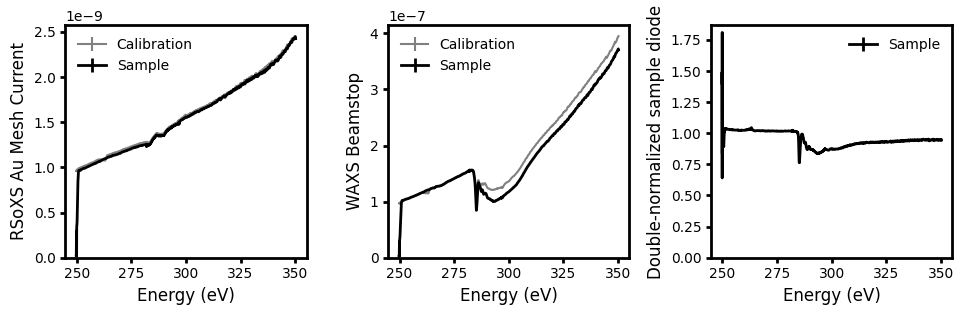

In [ ]:
## Manual
ScanID_Calibration = 83544



## Automated
Calibration = GatherDataStreams_SingleRun(ScanID_Calibration)
Calibration_ToMerge = xr.Dataset(data_vars={"I0_Calibration": ("Energy", np.interp(np.array(Scan["Energy"]), np.array(Calibration["Energy"]), np.array(Calibration["I0"]))),
                                           "Diode_Calibration": ("Energy", np.interp(np.array(Scan["Energy"]), np.array(Calibration["Energy"]), np.array(Calibration["Diode"])))},
                                 coords={"Energy": np.array(Scan["Energy"])})
Scan = xr.merge((Scan, Calibration_ToMerge))
Scan = Scan.update({"Diode_DoubleNormalized": (Scan["Diode"]/Scan["I0"])*(Scan["I0_Calibration"]/Scan["Diode_Calibration"])})


## Plotting
NumRows, NumColumns = 1, 3;
fig, axs = plt.subplots(NumRows, NumColumns, figsize=(NumColumns*3.25, NumRows*3.25), edgecolor=(0, 0, 0, 0), linewidth=3)
PlotColor = (0, 0, 0, 1)
PlotColor_Calibration = (0.5, 0.5, 0.5, 1)
axs[0].errorbar(Scan["Energy"], Scan["I0_Calibration"], yerr=0, label="Calibration", capsize=0, marker=".", markersize=0, color=PlotColor_Calibration, linestyle="solid")
axs[0].errorbar(Scan["Energy"], Scan["I0"], yerr=0, label="Sample", capsize=0, marker=".", markersize=0, color=PlotColor, linestyle="solid", linewidth=2)
axs[0].set_ylabel("RSoXS Au Mesh Current", color=(0, 0, 0, 1), size=12)
axs[1].errorbar(Scan["Energy"], Scan["Diode_Calibration"], yerr=0, label="Calibration", capsize=0, marker=".", markersize=0, color=PlotColor_Calibration, linestyle="solid")
axs[1].errorbar(Scan["Energy"], Scan["Diode"], yerr=0, label="Sample", capsize=0, marker=".", markersize=0, color=PlotColor, linestyle="solid", linewidth=2)
axs[1].set_ylabel("WAXS Beamstop", color=(0, 0, 0, 1), size=12)
axs[2].errorbar(Scan["Energy"], Scan["Diode_DoubleNormalized"], yerr=0, label="Sample", capsize=0, marker=".", markersize=0, color=PlotColor, linestyle="solid", linewidth=2)
axs[2].set_ylabel("Double-normalized sample diode", color=(0, 0, 0, 1), size=12)

## Plot Formatting
for Index_PlotRows in np.arange(0, NumRows, 1):
    for Index_Plotcolumns in np.arange(0, NumColumns, 1):
        if NumRows==1: PlotRow = axs;
        if NumRows>1: PlotRow = axs[Index_PlotRows];
        ax = PlotRow[Index_Plotcolumns]
        ax.set_xlabel("Energy (eV)", color=(0, 0, 0, 1), size=12)
        ax.set_xscale("linear")
        ax.set_yscale("linear")
        ax.set_ylim(bottom=0, top=None, auto=True)
        ax.spines['top'].set_linewidth(2) ## axes/border linewidths
        ax.spines['bottom'].set_linewidth(2)
        ax.spines['left'].set_linewidth(2)
        ax.spines['right'].set_linewidth(2)
        ax.spines['top'].set_color((0, 0, 0, 1)) ## axes/border colors
        ax.spines['bottom'].set_color((0, 0, 0, 1))
        ax.spines['left'].set_color((0, 0, 0, 1))
        ax.spines['right'].set_color((0, 0, 0, 1))
        ax.tick_params(axis="x",colors=(0, 0, 0, 1), width=2)
        ax.tick_params(axis="y",colors=(0, 0, 0, 1), width=2)
        ax.legend(edgecolor=(1, 1, 1, 1))
plt.tight_layout() ## This ensures that subplots don't overlap


### Perform pre- and post-edge normalization

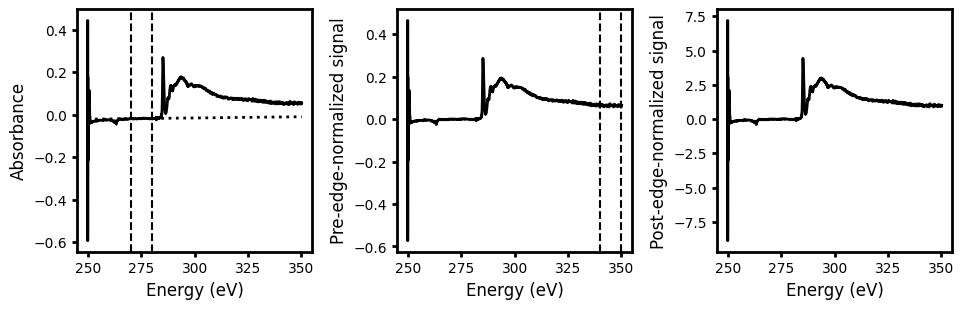

In [ ]:
## Manual
EnergyStart_PreEdge = 270
EnergyEnd_PreEdge = 280
EnergyStart_PostEdge = 340
EnergyEnd_PostEdge = 350
FilmThickness = 33.0




## Automated
Scan = Scan.update({"Absorbance": np.log(1/Scan["Diode_DoubleNormalized"])})
PreEdge = Scan["Absorbance"].sel(Energy=slice(EnergyStart_PreEdge, EnergyEnd_PreEdge))
SlopeIntercept = np.polyfit(PreEdge["Energy"], PreEdge, 1) ## Linear regression, ## TODO: have option for bare atom exponential baseline
Scan = Scan.update({"Baseline_PreEdge": SlopeIntercept[0]*Scan["Energy"] + SlopeIntercept[1]})
Scan = Scan.update({"Signal_PreEdgeNormalized": Scan["Absorbance"] - Scan["Baseline_PreEdge"]})
PostEdge = Scan["Signal_PreEdgeNormalized"].sel(Energy=slice(EnergyStart_PostEdge, EnergyEnd_PostEdge))
Scan = Scan.update({"Signal_PostEdgeNormalized": Scan["Signal_PreEdgeNormalized"]/PostEdge.mean()})
Scan = Scan.update({"MuRho": Scan["Signal_PreEdgeNormalized"]/((1e-9)*FilmThickness)}) ## Pre-edge-normalized reference spectrum for compositional (volume fraction) fitting

## Plotting
PlotLabel = ""
NumRows, NumColumns = 1, 3;
fig, axs = plt.subplots(NumRows, NumColumns, figsize=(NumColumns*3.25, NumRows*3.25), edgecolor=(0, 0, 0, 0), linewidth=3)
axs[0].errorbar(Scan["Energy"], Scan["Absorbance"], yerr=0, label=PlotLabel, capsize=0, marker=".", markersize=0, color=PlotColor, linestyle="solid", linewidth=2)
axs[0].errorbar(Scan["Energy"], Scan["Baseline_PreEdge"], yerr=0, label=PlotLabel, capsize=0, marker=".", markersize=0, color=PlotColor, linestyle="dotted", linewidth=2)
axs[0].axvline(PreEdge["Energy"].isel(Energy=0), color=PlotColor, linestyle="dashed")
axs[0].axvline(PreEdge["Energy"].isel(Energy=-1), color=PlotColor, linestyle="dashed")
axs[0].set_ylabel("Absorbance", color=(0, 0, 0, 1), size=12)
axs[1].errorbar(Scan["Energy"], Scan["Signal_PreEdgeNormalized"], yerr=0, label=PlotLabel, capsize=0, marker=".", markersize=0, color=PlotColor, linestyle="solid", linewidth=2)
axs[1].axvline(PostEdge["Energy"].isel(Energy=0), color=PlotColor, linestyle="dashed")
axs[1].axvline(PostEdge["Energy"].isel(Energy=-1), color=PlotColor, linestyle="dashed")
axs[1].set_ylabel("Pre-edge-normalized signal", color=(0, 0, 0, 1), size=12)
axs[2].errorbar(Scan["Energy"], Scan["Signal_PostEdgeNormalized"], yerr=0, label=PlotLabel, capsize=0, marker=".", markersize=0, color=PlotColor, linestyle="solid", linewidth=2)
axs[2].set_ylabel("Post-edge-normalized signal", color=(0, 0, 0, 1), size=12)

## Plot Formatting
for Index_PlotRows in np.arange(0, NumRows, 1):
    for Index_Plotcolumns in np.arange(0, NumColumns, 1):
        if NumRows==1: PlotRow = axs;
        if NumRows>1: PlotRow = axs[Index_PlotRows];
        ax = PlotRow[Index_Plotcolumns]
        ax.set_xlabel("Energy (eV)", color=(0, 0, 0, 1), size=12)
        ax.set_xscale("linear")
        ax.set_yscale("linear")
        #ax.set_ylim(bottom=0, top=None, auto=True)
        ax.spines['top'].set_linewidth(2) ## axes/border linewidths
        ax.spines['bottom'].set_linewidth(2)
        ax.spines['left'].set_linewidth(2)
        ax.spines['right'].set_linewidth(2)
        ax.spines['top'].set_color((0, 0, 0, 1)) ## axes/border colors
        ax.spines['bottom'].set_color((0, 0, 0, 1))
        ax.spines['left'].set_color((0, 0, 0, 1))
        ax.spines['right'].set_color((0, 0, 0, 1))
        ax.tick_params(axis="x",colors=(0, 0, 0, 1), width=2)
        ax.tick_params(axis="y",colors=(0, 0, 0, 1), width=2)
        ax.legend(edgecolor=(1, 1, 1, 1))
plt.tight_layout() ## This ensures that subplots don't overlap



### Export to Excel, if desired

In [ ]:
FilePath = r"/content/drive/Shareddrives/NISTPostdoc/CharacterizationData/BeamTime/20240326_SST1_MurphyBeaucage/DataAnalysis"

Scan_df = Scan.to_dataframe() ## Convert to pandas dataframe
TimeStamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S") ## Can add timestamp to avoid overwriting different versions of data reduction for the same sample
SampleName = Catalog[int(ScanID)].start["sample_id"]
FileName = f"{TimeStamp}_Scan{int(ScanID)}_{SampleName}.xlsx"
Scan_df.to_excel(os.path.join(FilePath, FileName)) ## Can add on other information from metadata as well, if desired

### Plot summary of several datasets if needed

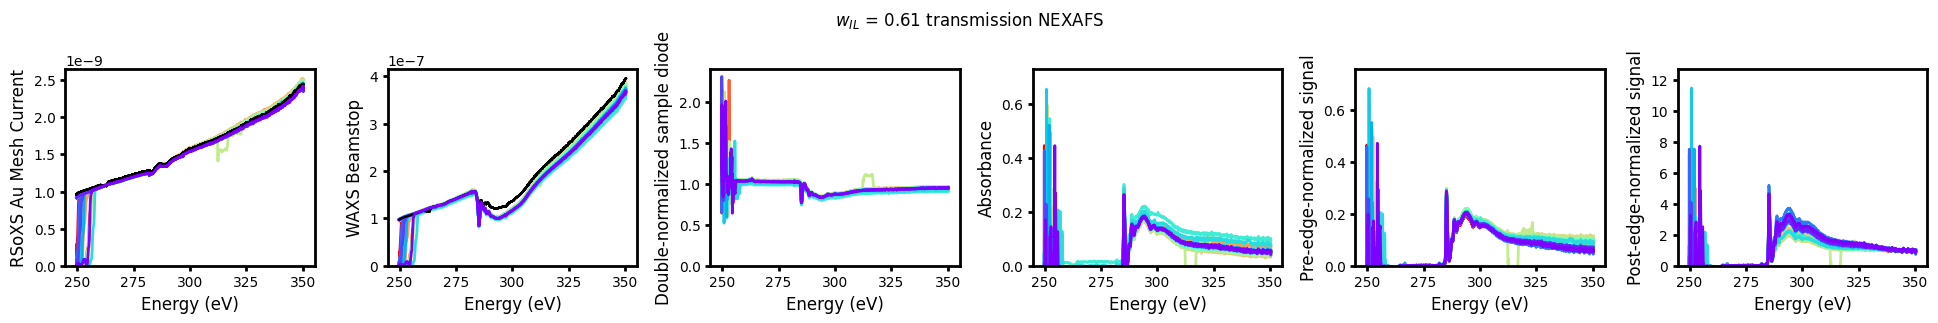

In [ ]:
## Manual
FilePath = r"/content/drive/Shareddrives/NISTPostdoc/CharacterizationData/BeamTime/20240326_SST1_MurphyBeaucage/DataAnalysis"
## Load reduced files
FileNames = np.array(["2024-04-18_16-40-26_Scan83545_PK_B61.xlsx",
                      "2024-04-18_16-40-40_Scan83546_PK_B61_1.xlsx",
                      "2024-04-18_16-40-55_Scan83547_PK_B61_2.xlsx",
                      "2024-04-18_16-41-09_Scan83548_PK_B61_3.xlsx",
                      "2024-04-18_16-41-25_Scan83549_PK_B61_4.xlsx",
                      "2024-04-18_16-41-39_Scan83550_PK_B61_5.xlsx",
                      "2024-04-18_16-41-52_Scan83551_PK_B61_6.xlsx",
                      "2024-04-18_16-42-08_Scan83552_PK_B61_7.xlsx",
                      "2024-04-18_16-42-21_Scan83553_PK_B61_8.xlsx",
                      "2024-04-18_16-42-37_Scan83554_PK_B61_9.xlsx",
                      "2024-04-18_16-42-50_Scan83555_PK_B61_10.xlsx",
                      "2024-04-18_16-43-04_Scan83556_PK_B61_11.xlsx",
                      "2024-04-18_16-43-19_Scan83557_PK_B61_12.xlsx",
                      "2024-04-18_16-43-33_Scan83558_PK_B61_13.xlsx",
                      "2024-04-18_16-43-46_Scan83559_PK_B61_14.xlsx",
                      "2024-04-18_16-44-00_Scan83560_PK_B61_15.xlsx",
                      "2024-04-18_16-45-25_Scan83566_PK_B61_21.xlsx",
                      "2024-04-18_16-45-41_Scan83567_PK_B61_22.xlsx",
                      "2024-04-18_16-45-54_Scan83568_PK_B61_23.xlsx",
                      "2024-04-18_16-46-08_Scan83569_PK_B61_24.xlsx",
                      "2024-04-18_16-46-21_Scan83570_PK_B61_25.xlsx",
                      "2024-04-18_16-46-37_Scan83571_PK_B61_26.xlsx",
                      "2024-04-18_16-46-51_Scan83572_PK_B61_27.xlsx",
                      "2024-04-18_16-47-04_Scan83573_PK_B61_28.xlsx",
                      "2024-04-18_16-47-17_Scan83574_PK_B61_29.xlsx"])



NumRows, NumColumns = 1, 6;
fig, axs = plt.subplots(NumRows, NumColumns, figsize=(NumColumns*3.25, NumRows*3.25), edgecolor=(0, 0, 0, 0), linewidth=3)
fig.suptitle(("$w_{IL}$ = 0.61 transmission NEXAFS"), color=(0, 0, 0, 1), size=12)
PlotColors = cm.rainbow(np.linspace(1, 0, FileNames.size))
for Index_PlotRows in np.arange(0, NumRows, 1):
    for Index_FileNames in np.arange(0, FileNames.size, 1):
        Scan_df = pd.read_excel(os.path.join(FilePath, FileNames[Index_FileNames]))
        Scan = xr.Dataset.from_dataframe(Scan_df)

        ## Plotting
        PlotLabel = ""
        PlotColor = PlotColors[Index_FileNames]
        PlotColor_Calibration = (0, 0, 0, 1)
        if NumRows==1: PlotRow = axs;
        if NumRows>1: PlotRow = axs[Index_PlotRows];
        ax = PlotRow[0]
        ax.errorbar(Scan["Energy"], Scan["I0_Calibration"], yerr=0, label=PlotLabel, capsize=0, marker=".", markersize=0, color=PlotColor_Calibration, linestyle="solid")
        ax.errorbar(Scan["Energy"], Scan["I0"], yerr=0, label=PlotLabel, capsize=0, marker=".", markersize=0, color=PlotColor, linestyle="solid", linewidth=2)
        ax.set_ylabel("RSoXS Au Mesh Current", color=(0, 0, 0, 1), size=12)
        ax = PlotRow[1]
        ax.errorbar(Scan["Energy"], Scan["Diode_Calibration"], yerr=0, label=PlotLabel, capsize=0, marker=".", markersize=0, color=PlotColor_Calibration, linestyle="solid")
        ax.errorbar(Scan["Energy"], Scan["Diode"], yerr=0, label=PlotLabel, capsize=0, marker=".", markersize=0, color=PlotColor, linestyle="solid", linewidth=2)
        ax.set_ylabel("WAXS Beamstop", color=(0, 0, 0, 1), size=12)
        ax = PlotRow[2]
        ax.errorbar(Scan["Energy"], Scan["Diode_DoubleNormalized"], yerr=0, label=PlotLabel, capsize=0, marker=".", markersize=0, color=PlotColor, linestyle="solid", linewidth=2)
        ax.set_ylabel("Double-normalized sample diode", color=(0, 0, 0, 1), size=12)
        ax = PlotRow[3]
        ax.errorbar(Scan["Energy"], Scan["Absorbance"], yerr=0, label=PlotLabel, capsize=0, marker=".", markersize=0, color=PlotColor, linestyle="solid", linewidth=2)
        ax.set_ylabel("Absorbance", color=(0, 0, 0, 1), size=12)
        ax = PlotRow[4]
        ax.errorbar(Scan["Energy"], Scan["Signal_PreEdgeNormalized"], yerr=0, label=PlotLabel, capsize=0, marker=".", markersize=0, color=PlotColor, linestyle="solid", linewidth=2)
        ax.set_ylabel("Pre-edge-normalized signal", color=(0, 0, 0, 1), size=12)
        ax = PlotRow[5]
        ax.errorbar(Scan["Energy"], Scan["Signal_PostEdgeNormalized"], yerr=0, label=PlotLabel, capsize=0, marker=".", markersize=0, color=PlotColor, linestyle="solid", linewidth=2)
        ax.set_ylabel("Post-edge-normalized signal", color=(0, 0, 0, 1), size=12)


## Plot Formatting
for Index_PlotRows in np.arange(0, NumRows, 1):
    for Index_Plotcolumns in np.arange(0, NumColumns, 1):
        if NumRows==1: PlotRow = axs;
        if NumRows>1: PlotRow = axs[Index_PlotRows];
        ax = PlotRow[Index_Plotcolumns]
        ax.set_xlabel("Energy (eV)", color=(0, 0, 0, 1), size=12)
        ax.set_xscale("linear")
        ax.set_yscale("linear")
        ax.set_ylim(bottom=0, top=None, auto=True)
        ax.spines['top'].set_linewidth(2) ## axes/border linewidths
        ax.spines['bottom'].set_linewidth(2)
        ax.spines['left'].set_linewidth(2)
        ax.spines['right'].set_linewidth(2)
        ax.spines['top'].set_color((0, 0, 0, 1)) ## axes/border colors
        ax.spines['bottom'].set_color((0, 0, 0, 1))
        ax.spines['left'].set_color((0, 0, 0, 1))
        ax.spines['right'].set_color((0, 0, 0, 1))
        ax.tick_params(axis="x",colors=(0, 0, 0, 1), width=2)
        ax.tick_params(axis="y",colors=(0, 0, 0, 1), width=2)
plt.tight_layout() ## This ensures that subplots don't overlap





### Peak fitting

In [ ]:
## TODO: clean up older code and add here



### Compositional fitting

In [ ]:
## TODO: clean up older code and add here

### kkcalc

In [ ]:
## Use Dean's kkcalc notebook

### Loop through multiple scans

If multiple scans require similar processing, can loop through the interpolation of streams, double normalization, and pre-/post-edge normalization here.

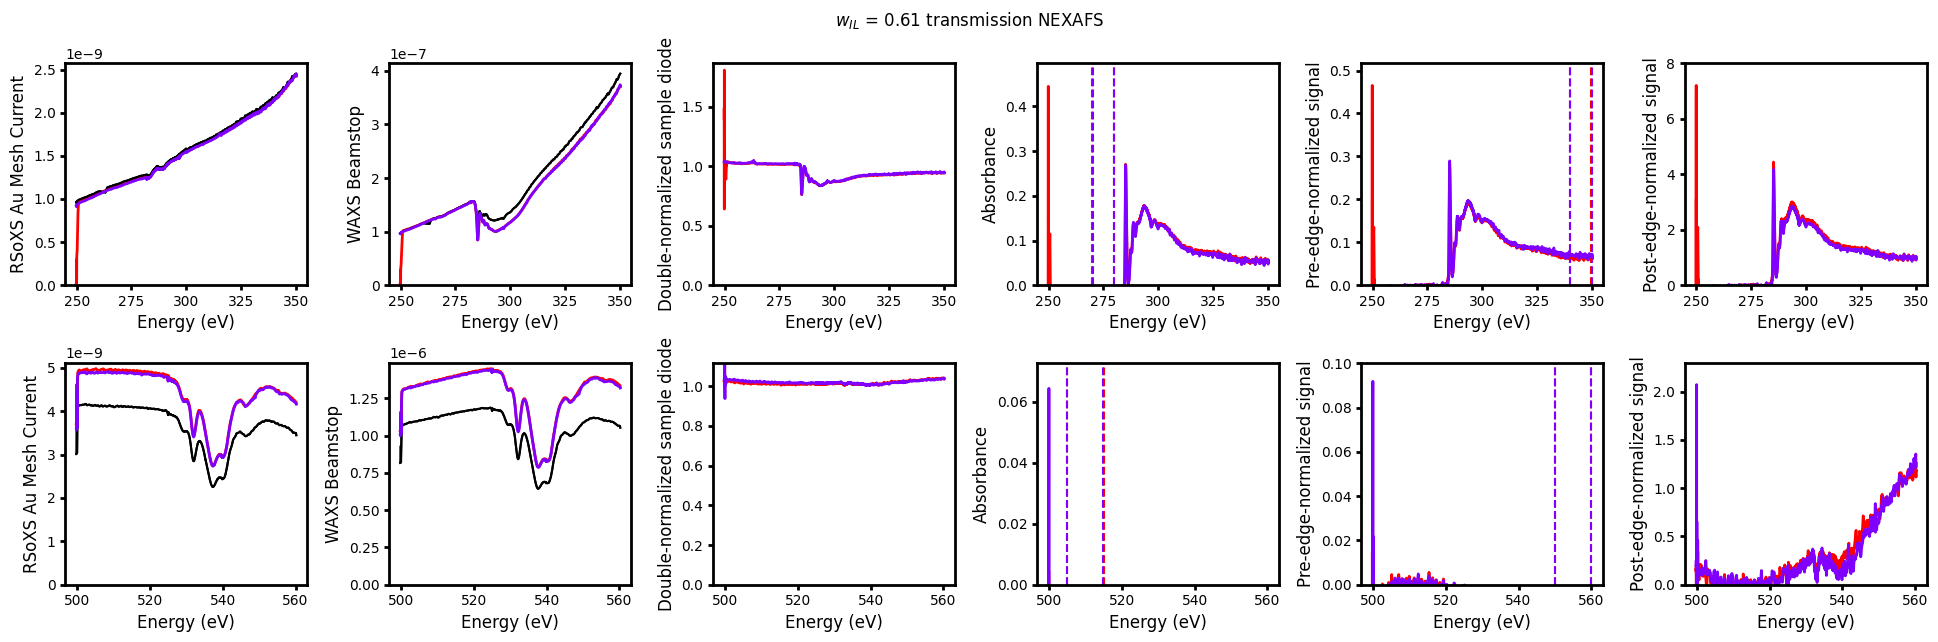

In [ ]:
## Manual
Scans_ToAnalyze = xr.Dataset(data_vars = {"ScanIDs": (["Edges", "SpotNumbers"], np.array([[83545, 83546], [83582, 83583]]))},
                             coords = {"Edges": np.array(["C", "O"]),
                                       "SpotNumbers": np.array([0, 1])},
                             attrs = {"FilmThickness": 33.0})
Scans_ToAnalyze = Scans_ToAnalyze.update({"ScanIDs_Calibration": (["Edges", "SpotNumbers"], np.array([[83544, 83544], [83617, 83617]]))})
Scans_ToAnalyze = Scans_ToAnalyze.update({"EnergyStart_PreEdge": (["Edges", "SpotNumbers"], np.array([[270, 270], [505, 505]]))})
Scans_ToAnalyze = Scans_ToAnalyze.update({"EnergyEnd_PreEdge": (["Edges", "SpotNumbers"], np.array([[280, 280], [515, 515]]))})
Scans_ToAnalyze = Scans_ToAnalyze.update({"EnergyStart_PostEdge": (["Edges", "SpotNumbers"], np.array([[340, 340], [550, 550]]))})
Scans_ToAnalyze = Scans_ToAnalyze.update({"EnergyEnd_PostEdge": (["Edges", "SpotNumbers"], np.array([[350, 350], [560, 560]]))})

SaveExcel = False ## Whether or not I want to save as an excel file


## Automated
def GatherDataStreams_SingleRun(ScanID):
    Scan_Raw = Catalog[int(ScanID)]
    Scan_Xarray = None
    for StreamName in list(Scan_Raw.keys()):
        if "monitor" in StreamName:
            if Scan_Xarray is None:
                Scan_Xarray = Scan_Raw[StreamName].data.read()
            else:
                Scan_Xarray = xr.merge((Scan_Xarray, Scan_Raw[StreamName].data.read()))
    for VariableName in (list(Scan_Xarray.data_vars.keys()) + list(Scan_Xarray.coords.keys())):
        if ("energy" or "en_monoen_readback") in VariableName: Scan_Xarray = Scan_Xarray.rename_vars({VariableName: "Energy"})
        if "Au Mesh" in VariableName: Scan_Xarray = Scan_Xarray.rename_vars({VariableName: "I0"})
        if "Sample Current" in VariableName: Scan_Xarray = Scan_Xarray.rename_vars({VariableName: "SampleCurrent"})
        if "WAXS Beamstop" in VariableName: Scan_Xarray = Scan_Xarray.rename_vars({VariableName: "Diode"})
    Scan_Xarray = Scan_Xarray.interpolate_na("time").ffill("time").bfill("time")
    Scan_Xarray = Scan_Xarray.swap_dims({"time": "Energy"})
    Scan_Xarray = Scan_Xarray.groupby("Energy").first()
    return Scan_Xarray

NumRows, NumColumns = Scans_ToAnalyze.coords["Edges"].size, 6;
fig, axs = plt.subplots(NumRows, NumColumns, figsize=(NumColumns*3.25, NumRows*3.25), edgecolor=(0, 0, 0, 0), linewidth=3)
fig.suptitle(("$w_{IL}$ = 0.61 transmission NEXAFS"), color=(0, 0, 0, 1), size=12)
for Index_PlotRows in np.arange(0, NumRows, 1):
    PlotColors = cm.rainbow(np.linspace(1, 0, Scans_ToAnalyze.coords["SpotNumbers"].size))
    for Index_ScanIDs in np.arange(0, Scans_ToAnalyze.coords["SpotNumbers"].size, 1):
        ScanID = int(Scans_ToAnalyze["ScanIDs"].isel(Edges=Index_PlotRows).isel(SpotNumbers=Index_ScanIDs).values)
        ScanID_Calibration = int(Scans_ToAnalyze["ScanIDs_Calibration"].isel(Edges=Index_PlotRows).isel(SpotNumbers=Index_ScanIDs).values)
        EnergyStart_PreEdge = Scans_ToAnalyze["EnergyStart_PreEdge"].isel(Edges=Index_PlotRows).isel(SpotNumbers=Index_ScanIDs).values
        EnergyEnd_PreEdge = Scans_ToAnalyze["EnergyEnd_PreEdge"].isel(Edges=Index_PlotRows).isel(SpotNumbers=Index_ScanIDs).values
        EnergyStart_PostEdge = Scans_ToAnalyze["EnergyStart_PostEdge"].isel(Edges=Index_PlotRows).isel(SpotNumbers=Index_ScanIDs).values
        EnergyEnd_PostEdge = Scans_ToAnalyze["EnergyEnd_PostEdge"].isel(Edges=Index_PlotRows).isel(SpotNumbers=Index_ScanIDs).values
        FilmThickness = Scans_ToAnalyze.attrs["FilmThickness"]

        ## Calculations: open the scan, get desired datastreams into one xarray, and gather new calculations into this xarray
        Scan = GatherDataStreams_SingleRun(ScanID)
        Calibration = GatherDataStreams_SingleRun(ScanID_Calibration) ## Make separate xarray for calibrations
        ## Rename calibration xarray variables and then merge them into scan.
        Calibration_ToMerge = xr.Dataset(data_vars={"I0_Calibration": ("Energy", np.interp(np.array(Scan["Energy"]), np.array(Calibration["Energy"]), np.array(Calibration["I0"]))),
                                                   "Diode_Calibration": ("Energy", np.interp(np.array(Scan["Energy"]), np.array(Calibration["Energy"]), np.array(Calibration["Diode"])))},
                                         coords={"Energy": np.array(Scan["Energy"])})
        Scan = xr.merge((Scan, Calibration_ToMerge))
        Scan = Scan.update({"Diode_DoubleNormalized": (Scan["Diode"]/Scan["I0"])*(Scan["I0_Calibration"]/Scan["Diode_Calibration"])})
        Scan = Scan.update({"Absorbance": np.log(1/Scan["Diode_DoubleNormalized"])})
        PreEdge = Scan["Absorbance"].sel(Energy=slice(EnergyStart_PreEdge, EnergyEnd_PreEdge))
        SlopeIntercept = np.polyfit(PreEdge["Energy"], PreEdge, 1)
        Scan = Scan.update({"Baseline_PreEdge": SlopeIntercept[0]*Scan["Energy"] + SlopeIntercept[1]})
        Scan = Scan.update({"Signal_PreEdgeNormalized": Scan["Absorbance"] - Scan["Baseline_PreEdge"]})
        PostEdge = Scan["Signal_PreEdgeNormalized"].sel(Energy=slice(EnergyStart_PostEdge, EnergyEnd_PostEdge))
        Scan = Scan.update({"Signal_PostEdgeNormalized": Scan["Signal_PreEdgeNormalized"]/PostEdge.mean()})
        Scan = Scan.update({"MuRho": Scan["Signal_PreEdgeNormalized"]/((1e-9)*FilmThickness)}) ## Pre-edge-normalized reference spectrum for compositional (volume fraction) fitting

        ## Plotting
        PlotLabel = ""
        PlotColor = PlotColors[Index_ScanIDs]
        PlotColor_Calibration = (0, 0, 0, 1)
        if NumRows==1: PlotRow = axs;
        if NumRows>1: PlotRow = axs[Index_PlotRows];
        ax = PlotRow[0]
        ax.errorbar(Scan["Energy"], Scan["I0_Calibration"], yerr=0, label=PlotLabel, capsize=0, marker=".", markersize=0, color=PlotColor_Calibration, linestyle="solid")
        ax.errorbar(Scan["Energy"], Scan["I0"], yerr=0, label=PlotLabel, capsize=0, marker=".", markersize=0, color=PlotColor, linestyle="solid", linewidth=2)
        ax.set_ylabel("RSoXS Au Mesh Current", color=(0, 0, 0, 1), size=12)
        ax = PlotRow[1]
        ax.errorbar(Scan["Energy"], Scan["Diode_Calibration"], yerr=0, label=PlotLabel, capsize=0, marker=".", markersize=0, color=PlotColor_Calibration, linestyle="solid")
        ax.errorbar(Scan["Energy"], Scan["Diode"], yerr=0, label=PlotLabel, capsize=0, marker=".", markersize=0, color=PlotColor, linestyle="solid", linewidth=2)
        ax.set_ylabel("WAXS Beamstop", color=(0, 0, 0, 1), size=12)
        ax = PlotRow[2]
        ax.errorbar(Scan["Energy"], Scan["Diode_DoubleNormalized"], yerr=0, label=PlotLabel, capsize=0, marker=".", markersize=0, color=PlotColor, linestyle="solid", linewidth=2)
        ax.set_ylabel("Double-normalized sample diode", color=(0, 0, 0, 1), size=12)
        ax = PlotRow[3]
        ax.errorbar(Scan["Energy"], Scan["Absorbance"], yerr=0, label=PlotLabel, capsize=0, marker=".", markersize=0, color=PlotColor, linestyle="solid", linewidth=2)
        ax.axvline(PreEdge["Energy"].isel(Energy=0), color=PlotColor, linestyle="dashed")
        ax.axvline(PreEdge["Energy"].isel(Energy=-1), color=PlotColor, linestyle="dashed")
        ax.set_ylabel("Absorbance", color=(0, 0, 0, 1), size=12)
        ax = PlotRow[4]
        ax.errorbar(Scan["Energy"], Scan["Signal_PreEdgeNormalized"], yerr=0, label=PlotLabel, capsize=0, marker=".", markersize=0, color=PlotColor, linestyle="solid", linewidth=2)
        ax.axvline(PostEdge["Energy"].isel(Energy=0), color=PlotColor, linestyle="dashed")
        ax.axvline(PostEdge["Energy"].isel(Energy=-1), color=PlotColor, linestyle="dashed")
        ax.set_ylabel("Pre-edge-normalized signal", color=(0, 0, 0, 1), size=12)
        ax = PlotRow[5]
        ax.errorbar(Scan["Energy"], Scan["Signal_PostEdgeNormalized"], yerr=0, label=PlotLabel, capsize=0, marker=".", markersize=0, color=PlotColor, linestyle="solid", linewidth=2)
        ax.set_ylabel("Post-edge-normalized signal", color=(0, 0, 0, 1), size=12)

        ## Exporting to excel
        if SaveExcel == True:
            FilePath = r"/content/drive/Shareddrives/NISTPostdoc/CharacterizationData/BeamTime/20240326_SST1_MurphyBeaucage/DataAnalysis"

            Scan_df = Scan.to_dataframe() ## Convert to pandas dataframe
            TimeStamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S") ## Can add timestamp to avoid overwriting different versions of data reduction for the same sample
            SampleName = Catalog[int(ScanID)].start["sample_id"]
            FileName = f"{TimeStamp}_Scan{int(ScanID)}_{SampleName}.xlsx"
            Scan_df.to_excel(os.path.join(FilePath, FileName))


## Plot Formatting
for Index_PlotRows in np.arange(0, NumRows, 1):
    for Index_Plotcolumns in np.arange(0, NumColumns, 1):
        if NumRows==1: PlotRow = axs;
        if NumRows>1: PlotRow = axs[Index_PlotRows];
        ax = PlotRow[Index_Plotcolumns]
        ax.set_xlabel("Energy (eV)", color=(0, 0, 0, 1), size=12)
        ax.set_xscale("linear")
        ax.set_yscale("linear")
        ax.set_ylim(bottom=0, top=None, auto=True)
        ax.spines['top'].set_linewidth(2) ## axes/border linewidths
        ax.spines['bottom'].set_linewidth(2)
        ax.spines['left'].set_linewidth(2)
        ax.spines['right'].set_linewidth(2)
        ax.spines['top'].set_color((0, 0, 0, 1)) ## axes/border colors
        ax.spines['bottom'].set_color((0, 0, 0, 1))
        ax.spines['left'].set_color((0, 0, 0, 1))
        ax.spines['right'].set_color((0, 0, 0, 1))
        ax.tick_params(axis="x",colors=(0, 0, 0, 1), width=2)
        ax.tick_params(axis="y",colors=(0, 0, 0, 1), width=2)
plt.tight_layout() ## This ensures that subplots don't overlap



